In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
dataset = pd.read_csv("data.csv")

M= Cancerous B=Non-Cancerous

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Converting Label to numeric (0 = non-cancerous,1 = cancerous)

In [4]:
dataset['label'] = pd.factorize(dataset.diagnosis)[0]

In [5]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,label
0,842302,B,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


Coefficient correlation

In [6]:
matrix = dataset.corr()
matrix['label']

id                         0.040667
radius_mean                0.726742
texture_mean               0.423130
perimeter_mean             0.738732
area_mean                  0.706087
smoothness_mean            0.353200
compactness_mean           0.585163
concavity_mean             0.687380
concave points_mean        0.768150
symmetry_mean              0.322749
fractal_dimension_mean    -0.021057
radius_se                  0.558623
texture_se                -0.006255
perimeter_se               0.546370
area_se                    0.539715
smoothness_se             -0.066302
compactness_se             0.288491
concavity_se               0.251341
concave points_se          0.406032
symmetry_se               -0.010708
fractal_dimension_se       0.074747
radius_worst               0.770339
texture_worst              0.462290
perimeter_worst            0.775289
area_worst                 0.727252
smoothness_worst           0.417114
compactness_worst          0.582048
concavity_worst            0

# Dimension Reduction
we are dropping the attributes that are less impactful

In [7]:
dataset = dataset.drop(['id'],axis = 1)
dataset = dataset.drop(['diagnosis'],axis = 1)
dataset = dataset.drop(['fractal_dimension_mean'],axis = 1)
dataset = dataset.drop(['texture_se'],axis = 1)
dataset = dataset.drop(['smoothness_se'],axis = 1)
dataset = dataset.drop(['compactness_se'],axis = 1)
dataset = dataset.drop(['concavity_se'],axis = 1)
dataset = dataset.drop(['symmetry_se'],axis = 1)
dataset = dataset.drop(['fractal_dimension_se'],axis = 1)
dataset = dataset.drop(['fractal_dimension_worst'],axis = 1)


Histogram of attributes against label

In [8]:
datasetAgainstCancer = dataset.drop(['label'],axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a83a28690>,
      dtype=object)

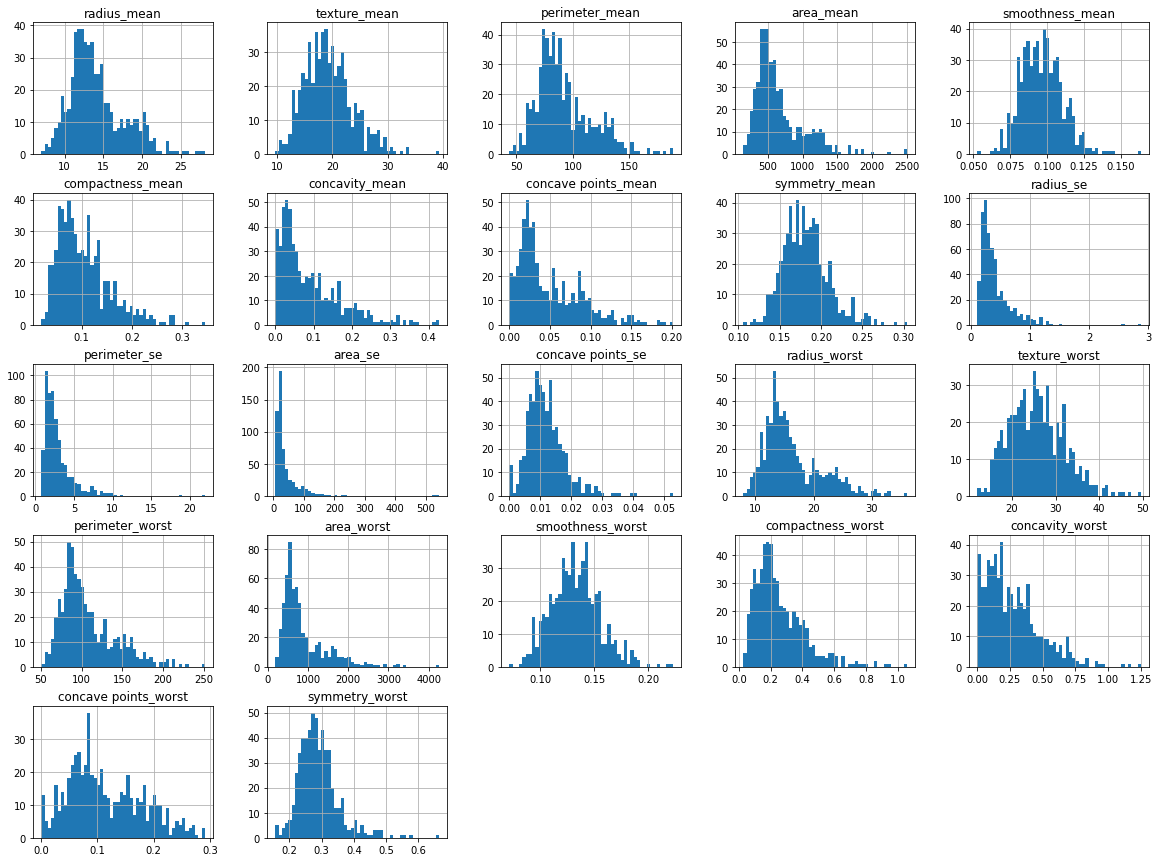

In [9]:
datasetAgainstCancer.hist(bins=50, figsize = (20,15))

In [10]:
dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,8.589,153.40,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,3.398,74.08,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,4.585,94.03,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,3.445,27.23,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,5.438,94.44,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,7.673,158.70,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,5.203,99.04,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,3.425,48.55,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,5.772,86.22,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,1


# Train-Test Splitting

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(dataset,test_size = 0.2,random_state = 42)

In [12]:
len(train_set)

455

In [13]:
len(test_set)

114

In [14]:
dataset['label'].value_counts()

0    358
1    211
Name: label, dtype: int64

## Stratified Sampling

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(dataset, dataset['label']):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [16]:
strat_train_set['label'].value_counts()

0    286
1    169
Name: label, dtype: int64

In [17]:
strat_test_set['label'].value_counts()

0    72
1    42
Name: label, dtype: int64

# Seperating attributes and label

In [18]:
strat_train_set_without_label = strat_train_set.drop("label",axis = 1)
labels = strat_train_set["label"].copy()

# Pipelining and feature scaling

In [19]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy = "median")
imputer.fit(strat_train_set)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy = "median")),
    ('std_scalar',StandardScaler()),
])

Transforming attributes to train the model 

In [21]:
dataset_num_tr = my_pipeline.fit_transform(strat_train_set_without_label)

In [22]:
dataset_num_tr

array([[ 0.21610675,  0.74097551,  0.41284774, ...,  2.95104048,
         2.01033284, -0.03590973],
       [ 0.23618475, -0.57466643,  0.16881572, ..., -0.99967143,
        -0.46825872, -0.80319835],
       [-1.55247834, -0.60060202, -1.53069296, ..., -1.3140562 ,
        -1.76127129, -0.73510564],
       ...,
       [ 0.1243216 , -1.35037646,  0.08871677, ..., -0.1355862 ,
        -0.3614347 , -0.43450122],
       [ 0.58037906, -0.78215118,  0.58715632, ..., -0.31434289,
         0.14510316,  0.44073925],
       [ 0.8356565 ,  0.38023498,  0.81541756, ...,  0.53971683,
         1.0228583 , -0.43948362]])

# Performance Measurement Metric

Function to find out score ,mean and deviation

In [23]:
def print_scores(scores):
    print("scores: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation: ",scores.std())

MSE,RMSE lower is better

# Logistic Regression

Creating Model with Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logisticModel = LogisticRegression()
logisticModel.fit(dataset_num_tr,labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Testing with just first 5 rows

In [25]:
some_data = strat_train_set_without_label.iloc[:5]

In [26]:
some_labels = labels.iloc[:5]

In [27]:
prepared_data = my_pipeline.transform(some_data)

In [28]:
logisticModel.predict(prepared_data)

array([1, 0, 0, 1, 1])

In [29]:
some_labels

430    1
169    0
391    0
567    1
24     1
Name: label, dtype: int64

Evaluating logistic Regression

In [30]:
from sklearn.metrics import mean_squared_error
stroke_predictions = logisticModel.predict(dataset_num_tr)
mse = mean_squared_error(labels,stroke_predictions)
rmse = np.sqrt(mse)
print(list(stroke_predictions))

[1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 

In [31]:
mse

0.02857142857142857

In [32]:
rmse

0.1690308509457033

Cross Validation for Logistic Regression

In [33]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logisticModel,dataset_num_tr,labels,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.14744196, 0.14744196, 0.29488391, 0.14744196, 0.25537696,
       0.        , 0.        , 0.        , 0.21081851, 0.21081851])

In [34]:
print_scores(rmse_scores)

scores:  [0.14744196 0.14744196 0.29488391 0.14744196 0.25537696 0.
 0.         0.         0.21081851 0.21081851]
Mean:  0.14142237613578942
Standard deviation:  0.10309088636624868


# Decission Tree Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor
decisionTreeModel = DecisionTreeRegressor()
decisionTreeModel.fit(dataset_num_tr,labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Evaluating Decission Tree Regression

In [36]:
from sklearn.metrics import mean_squared_error
stroke_predictions = decisionTreeModel.predict(dataset_num_tr)
mse = mean_squared_error(labels,stroke_predictions)
rmse = np.sqrt(mse)

In [37]:
mse

0.0

In [38]:
rmse

0.0

Cross Validation with Decission Tree Regression

In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decisionTreeModel,dataset_num_tr,labels,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [40]:
rmse_scores

array([0.32969024, 0.25537696, 0.25537696, 0.14744196, 0.14744196,
       0.21081851, 0.25819889, 0.21081851, 0.2981424 , 0.2981424 ])

In [41]:
print_scores(rmse_scores)

scores:  [0.32969024 0.25537696 0.25537696 0.14744196 0.14744196 0.21081851
 0.25819889 0.21081851 0.2981424  0.2981424 ]
Mean:  0.24114487725658257
Standard deviation:  0.058680073887636186


# KNN Model

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(dataset_num_tr,labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Evaluating KNN model

In [44]:
from sklearn.metrics import mean_squared_error
stroke_predictions = knn.predict(dataset_num_tr)
mse = mean_squared_error(labels,stroke_predictions)
rmse = np.sqrt(mse)

In [45]:
mse

0.0

In [46]:
rmse

0.0

# Cross Validation for KNN model

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn,dataset_num_tr,labels,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [48]:
rmse_scores

array([0.36115756, 0.20851441, 0.32969024, 0.14744196, 0.29488391,
       0.1490712 , 0.21081851, 0.21081851, 0.25819889, 0.25819889])

In [49]:
print_scores(rmse_scores)

scores:  [0.36115756 0.20851441 0.32969024 0.14744196 0.29488391 0.1490712
 0.21081851 0.21081851 0.25819889 0.25819889]
Mean:  0.24287940778270595
Standard deviation:  0.06770873283539709


## Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(dataset_num_tr,labels)

GaussianNB(priors=None, var_smoothing=1e-09)

## Evaluating Naive Bayes

In [51]:
from sklearn.metrics import mean_squared_error
stroke_predictions = model.predict(dataset_num_tr)
mse = mean_squared_error(labels,stroke_predictions)
rmse = np.sqrt(mse)

In [52]:
mse

0.06593406593406594

In [53]:
rmse

0.25677629550654774

## Cross Validation for Naive Bayes

In [54]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,dataset_num_tr,labels,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [55]:
print_scores(rmse_scores)

scores:  [0.25537696 0.25537696 0.32969024 0.32969024 0.20851441 0.25819889
 0.1490712  0.21081851 0.25819889 0.25819889]
Mean:  0.2513135184327472
Standard deviation:  0.051367469299436815


## Support Vector Machine

In [56]:
from sklearn import svm

In [57]:
SVMmodel = svm.SVC(kernel = "linear")

In [58]:
SVMmodel.fit(dataset_num_tr,labels)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Evaluating Support Vector Machine





In [59]:
from sklearn.metrics import mean_squared_error
stroke_predictions = SVMmodel.predict(dataset_num_tr)
mse = mean_squared_error(labels,stroke_predictions)
rmse = np.sqrt(mse)

In [60]:
rmse

0.1554857684028483

## Cross validation for SVM

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(SVMmodel,dataset_num_tr,labels,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [62]:
print_scores(rmse_scores)

scores:  [0.14744196 0.14744196 0.29488391 0.20851441 0.25537696 0.
 0.         0.         0.21081851 0.21081851]
Mean:  0.1475296219260072
Standard deviation:  0.1050568561376131


# Models and their corresponding RMSE scores

Lower RMSE is better

Logistic - 0.14
Decission Tree - 0.23
KNN - 0.24
Naive Bayes - 0.25
SVM - 0.14

Here RMSE is lowest for Logistic and SVM.So,we will test against test set with these two model

# Testing logistic Model with test set

In [63]:
X_test = strat_test_set.drop("label",axis = 1)
Y_test = strat_test_set["label"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = logisticModel.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [64]:
final_rmse

0.13245323570650439

In [65]:
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(Y_test,final_predictions))

Accuracy:  0.9824561403508771


In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(Y_test,final_predictions)

array([[71,  1],
       [ 1, 41]])

# Testing SVM Model with test set

In [68]:
final_predictions = SVMmodel.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [69]:
final_rmse

0.16222142113076254

In [70]:
print('Accuracy: ', accuracy_score(Y_test,final_predictions))

Accuracy:  0.9736842105263158


In [71]:
confusion_matrix(Y_test,final_predictions)

array([[71,  1],
       [ 2, 40]])

# Hyperparameter tuning of logistic model

In [72]:
logModel = LogisticRegression()

In [73]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [76]:
best_clf = clf.fit(dataset_num_tr,labels)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 1504 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 3374 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:  3.0min finished


In [77]:
best_clf.best_estimator_

LogisticRegression(C=0.03359818286283781, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Testing test data with hyper parameter tuned logistic model

In [78]:
final_predictions = clf.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [79]:
final_rmse

0.0936585811581694

In [80]:
print('Accuracy: ', accuracy_score(Y_test,final_predictions))

Accuracy:  0.9912280701754386


In [81]:
confusion_matrix(Y_test,final_predictions)

array([[72,  0],
       [ 1, 41]])

In [82]:
from joblib import dump,load
dump(clf,'cancer.joblib')
dump(my_pipeline,'pipeline')

['pipeline']

# Statistical Analysis for suggesting feature

In [83]:
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.405172,2.866059,40.337079,0.011796,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.370826
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.277313,2.021855,45.491006,0.006170,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.483451
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.111500,0.757000,6.802000,0.000000,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.232400,1.606000,17.850000,0.007638,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.324200,2.287000,24.530000,0.010930,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.478900,3.357000,45.190000,0.014710,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,2.873000,21.980000,542.200000,0.052790,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,1.000000


# Attrribute Combination

In [84]:
dataset['radius_perimeter_area_mean'] = dataset['radius_mean']*dataset['perimeter_mean']*dataset['area_mean']

In [85]:
dataset['radius_perimeter_area_worst'] = dataset['radius_worst']*dataset['perimeter_worst']*dataset['area_worst']

In [86]:
dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,label,radius_perimeter_area_mean,radius_perimeter_area_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,8.589,153.40,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0,2.211381e+06,9.459314e+06
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,3.398,74.08,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,1,3.624956e+06,7.762214e+06
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,4.585,94.03,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,1,3.079319e+06,6.142872e+06
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,3.445,27.23,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,1,3.420705e+05,8.368759e+05
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,5.438,94.44,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,1,3.555309e+06,5.403176e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,7.673,158.70,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,1,4.527988e+06,8.568626e+06
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,5.203,99.04,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,1,3.330372e+06,6.356145e+06
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,3.425,48.55,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,1,1.542675e+06,2.702957e+06
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,5.772,86.22,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,1,3.650866e+06,8.652671e+06


In [87]:
dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,label,radius_perimeter_area_mean,radius_perimeter_area_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,8.589,153.40,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0,2.211381e+06,9.459314e+06
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,3.398,74.08,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,1,3.624956e+06,7.762214e+06
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,4.585,94.03,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,1,3.079319e+06,6.142872e+06
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,3.445,27.23,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,1,3.420705e+05,8.368759e+05
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,5.438,94.44,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,1,3.555309e+06,5.403176e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,7.673,158.70,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,1,4.527988e+06,8.568626e+06
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,5.203,99.04,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,1,3.330372e+06,6.356145e+06
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,3.425,48.55,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,1,1.542675e+06,2.702957e+06
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,5.772,86.22,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,1,3.650866e+06,8.652671e+06


In [88]:
strat_train_set_without_label = dataset.drop("label",axis = 1)
labels = dataset["label"].copy()

In [89]:
strat_train_set_without_label

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,radius_perimeter_area_mean,radius_perimeter_area_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,8.589,153.40,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,2.211381e+06,9.459314e+06
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,3.398,74.08,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,3.624956e+06,7.762214e+06
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,4.585,94.03,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,3.079319e+06,6.142872e+06
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,3.445,27.23,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,3.420705e+05,8.368759e+05
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,5.438,94.44,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,3.555309e+06,5.403176e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,7.673,158.70,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,4.527988e+06,8.568626e+06
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,5.203,99.04,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,3.330372e+06,6.356145e+06
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,3.425,48.55,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,1.542675e+06,2.702957e+06
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,5.772,86.22,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,3.650866e+06,8.652671e+06


In [90]:
dataset_num_tr = my_pipeline.fit_transform(strat_train_set_without_label)

In [91]:
dataset_num_tr

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.75062224,
         0.6952191 ,  1.90902978],
       [ 1.82982061, -0.35363241,  1.68595471, ..., -0.24388967,
         1.64148275,  1.4506158 ],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.152255  ,
         1.27622678,  1.0132056 ],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ..., -1.10454895,
         0.24757947,  0.08402915],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  1.91908301,
         1.65882682,  1.69114256],
       [-1.80840125,  1.22179204, -1.81438851, ..., -0.04813821,
        -0.74004925, -0.60549553]])

In [92]:
from sklearn.linear_model import LogisticRegression
logisticModel = LogisticRegression()
logisticModel.fit(dataset_num_tr,labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
from sklearn.metrics import mean_squared_error
stroke_predictions = logisticModel.predict(dataset_num_tr)
mse = mean_squared_error(labels,stroke_predictions)
rmse = np.sqrt(mse)


In [94]:
rmse

0.14522269427144885

In [95]:
mse

0.0210896309314587

In [96]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logisticModel,dataset_num_tr,labels,scoring = "neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.18731716, 0.18731716, 0.13245324, 0.18731716, 0.        ,
       0.22941573, 0.26490647, 0.13245324, 0.        , 0.18898224])

In [97]:
print_scores(rmse_scores)

scores:  [0.18731716 0.18731716 0.13245324 0.18731716 0.         0.22941573
 0.26490647 0.13245324 0.         0.18898224]
Mean:  0.15101624001502095
Standard deviation:  0.08415053949225978


After attribute combination we did not get satisfactory RMSE.So we will not evaluate it further

# Testing with a third party dataset

In [98]:
dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,area_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,label,radius_perimeter_area_mean,radius_perimeter_area_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,1.0950,8.589,153.40,0.01587,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0,2.211381e+06,9.459314e+06
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.5435,3.398,74.08,0.01340,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,1,3.624956e+06,7.762214e+06
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.7456,4.585,94.03,0.02058,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,1,3.079319e+06,6.142872e+06
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.4956,3.445,27.23,0.01867,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,1,3.420705e+05,8.368759e+05
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.7572,5.438,94.44,0.01885,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,1,3.555309e+06,5.403176e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,1.1760,7.673,158.70,0.02454,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,1,4.527988e+06,8.568626e+06
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.7655,5.203,99.04,0.01678,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,1,3.330372e+06,6.356145e+06
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.4564,3.425,48.55,0.01557,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,1,1.542675e+06,2.702957e+06
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.7260,5.772,86.22,0.01664,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,1,3.650866e+06,8.652671e+06


In [99]:
dataset = dataset.drop(['compactness_mean'],axis = 1)
dataset = dataset.drop(['concavity_mean'],axis = 1)
dataset = dataset.drop(['concave points_mean'],axis = 1)
dataset = dataset.drop(['symmetry_mean'],axis = 1)
dataset = dataset.drop(['radius_se'],axis = 1)
dataset = dataset.drop(['perimeter_se'],axis = 1)
dataset = dataset.drop(['concave points_se'],axis = 1)
dataset = dataset.drop(['radius_worst'],axis = 1)
dataset = dataset.drop(['texture_worst'],axis = 1)
dataset = dataset.drop(['perimeter_worst'],axis = 1)
dataset = dataset.drop(['area_worst'],axis = 1)
dataset = dataset.drop(['smoothness_worst'],axis = 1)
dataset = dataset.drop(['compactness_worst'],axis = 1)
dataset = dataset.drop(['concavity_worst'],axis = 1)
dataset = dataset.drop(['concave points_worst'],axis = 1)
dataset = dataset.drop(['symmetry_worst'],axis = 1)
dataset = dataset.drop(['radius_perimeter_area_mean'],axis = 1)
dataset = dataset.drop(['radius_perimeter_area_worst'],axis = 1)
dataset = dataset.drop(['area_se'],axis = 1)

In [100]:
dataset

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,label
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,1
2,19.69,21.25,130.00,1203.0,0.10960,1
3,11.42,20.38,77.58,386.1,0.14250,1
4,20.29,14.34,135.10,1297.0,0.10030,1
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,1
565,20.13,28.25,131.20,1261.0,0.09780,1
566,16.60,28.08,108.30,858.1,0.08455,1
567,20.60,29.33,140.10,1265.0,0.11780,1


In [101]:
strat_train_set_without_label = dataset.drop("label",axis = 1)
labels = dataset["label"].copy()

In [102]:
strat_train_set_without_label

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [103]:
dataset_num_tr = my_pipeline.fit_transform(strat_train_set_without_label)

In [104]:
dataset_num_tr

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633],
       [ 1.82982061, -0.35363241,  1.68595471,  1.90870825, -0.82696245],
       [ 1.57988811,  0.45618695,  1.56650313,  1.55888363,  0.94221044],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578,  0.57795264, -0.84048388],
       [ 1.83834103,  2.33645719,  1.98252415,  1.73521799,  1.52576706],
       [-1.80840125,  1.22179204, -1.81438851, -1.34778924, -3.11208479]])

In [105]:
logisticModel.fit(dataset_num_tr,labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
third_party_dataset = pd.read_csv("third_party.csv")

In [107]:
third_party_dataset

,Unnamed: 0,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,label
0,0,17.99,10.38,122.80,1001.0,0.11840,0
1,1,20.57,17.77,132.90,1326.0,0.08474,1
2,2,19.69,21.25,130.00,1203.0,0.10960,1
3,3,11.42,20.38,77.58,386.1,0.14250,1
4,4,20.29,14.34,135.10,1297.0,0.10030,1
...,...,...,...,...,...,...,...
564,564,21.56,22.39,142.00,1479.0,0.11100,1
565,565,20.13,28.25,131.20,1261.0,0.09780,1
566,566,16.60,28.08,108.30,858.1,0.08455,1
567,567,20.60,29.33,140.10,1265.0,0.11780,1


In [108]:
third_party_dataset = third_party_dataset.drop(['Unnamed: 0'],axis = 1)

In [109]:
X_test = third_party_dataset.drop("label",axis = 1)
Y_test = third_party_dataset["label"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = logisticModel.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test,final_predictions)
final_rmse = np.sqrt(final_mse)

In [110]:
final_mse

0.07205623901581722

In [111]:
final_rmse

0.26843293206277286

In [112]:
print('Accuracy: ', accuracy_score(Y_test,final_predictions))

Accuracy:  0.9279437609841827
